## Part 3 Fine Tune CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Open CSV File from Part1

In [2]:
data = pd.read_csv("FinalData.csv", delimiter=';')

In [3]:
data.head(5)

,TMDB ID,poster path,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,337167,/jjPJ4s3DWZZvI4vw8Xfi4Vqa1Q8.jpg,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,269149,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,299536,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,354912,/eKi8dIrr8voobbaGzDpe8w0PVbC.jpg,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,427641,/30oXQKwibh0uANGMs0Sytw3uN22.jpg,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Remove Genres that are not as Popular

In [4]:
genres=data.drop(["TV Movie","Western","Documentary","War","Music","History","Animation","Mystery","Fantasy","Family"], axis=1)
genres.head(10)

,TMDB ID,poster path,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Science Fiction,Thriller
0,337167,/jjPJ4s3DWZZvI4vw8Xfi4Vqa1Q8.jpg,0,0,0,0,1,0,1,0,0
1,269149,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,0,1,1,0,0,0,0,0,0
2,299536,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,1,1,0,0,0,0,0,1,0
3,354912,/eKi8dIrr8voobbaGzDpe8w0PVbC.jpg,0,1,1,0,0,0,0,0,0
4,427641,/30oXQKwibh0uANGMs0Sytw3uN22.jpg,1,1,0,0,0,0,0,1,0
5,284054,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,1,1,0,0,0,0,0,1,0
6,321612,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,0,0,0,0,0,0,1,0,0
7,181808,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,0,1,0,0,0,0,0,1,0
8,447332,/nAU74GmpUk7t5iklEp3bufwDq4n.jpg,0,0,0,0,1,1,0,1,1
9,198663,/coss7RgL0NH6g4fC2s5atvf3dFO.jpg,1,0,0,0,0,0,0,1,1


### Remove any Empty Rows

In [5]:
sumRow=genres[["Action","Adventure","Comedy","Crime","Drama","Horror","Romance","Science Fiction","Thriller"]].sum(axis=1)
Remove=[]
print(len(sumRow))
for i in range(len(sumRow)):
    if(sumRow[i]==0):
        Remove.append(i)
genres=genres.drop(Remove)
print(genres.shape)

11062
(10590, 11)


In [6]:
genres.head(10)

,TMDB ID,poster path,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Science Fiction,Thriller
0,337167,/jjPJ4s3DWZZvI4vw8Xfi4Vqa1Q8.jpg,0,0,0,0,1,0,1,0,0
1,269149,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,0,1,1,0,0,0,0,0,0
2,299536,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,1,1,0,0,0,0,0,1,0
3,354912,/eKi8dIrr8voobbaGzDpe8w0PVbC.jpg,0,1,1,0,0,0,0,0,0
4,427641,/30oXQKwibh0uANGMs0Sytw3uN22.jpg,1,1,0,0,0,0,0,1,0
5,284054,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,1,1,0,0,0,0,0,1,0
6,321612,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,0,0,0,0,0,0,1,0,0
7,181808,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,0,1,0,0,0,0,0,1,0
8,447332,/nAU74GmpUk7t5iklEp3bufwDq4n.jpg,0,0,0,0,1,1,0,1,1
9,198663,/coss7RgL0NH6g4fC2s5atvf3dFO.jpg,1,0,0,0,0,0,0,1,1


# Preprocess Images and CNN

In [7]:
import glob
import scipy.misc 


from PIL import Image
from PIL import ImageEnhance
import PIL.ImageOps

In [8]:
VALIDATION_PERCENT = .2
TEST_PERCENT = .2
IMAGE_WIDTH = 154
IMAGE_HEIGHT=154
IMAGE_SIZE=154
NUM_CHANNELS = 3 # RGB channels
PIXEL_DEPTH = 255.0
NUM_GENRES = 9
NUM_ROWS=7000
PARTITION_TEST = False

In [9]:
def read_image_from_file(file_path):
    img = Image.open(file_path).convert('RGB')
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT), Image.ANTIALIAS) #downsample image
    pixel_values = np.array(img.getdata())
    return np.reshape(pixel_values, [IMAGE_WIDTH,IMAGE_HEIGHT, NUM_CHANNELS])
def scale_pixel_values(dataset):
    return (dataset - PIXEL_DEPTH / 2.0) / PIXEL_DEPTH

## Create Randomization


In [14]:
import random 

randomIndex=list(range(0,10590))
random.shuffle(randomIndex)

In [56]:
randomIndex_df = pd.DataFrame(randomIndex)

randomIndex_df.to_csv("randomIndex_10E.csv")

### Load Pictures in (TRAIN X) and (TRAIN Y) 

In [15]:
count=0
X_Train=np.ndarray((NUM_ROWS,IMAGE_WIDTH,IMAGE_HEIGHT,3), dtype=np.float32)
y_Train=np.ndarray((NUM_ROWS,NUM_GENRES), dtype=int)
for i in randomIndex[:7000]:
    temp=genres.iloc[i]
    path="Pictures/"+str(temp["TMDB ID"])+".jpg"
    img=read_image_from_file(path)
    X_Train[count]=img
    labels=np.asarray(temp[2:].values)
    #print(labels)
    y_Train[count]=labels
    count=count+1
    if count%100==0:
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000


### Load Pictures in (test X) and (test Y) 

In [16]:
count=0
X_Test=np.ndarray((3590,IMAGE_WIDTH,IMAGE_HEIGHT,3), dtype=np.float32)
y_Test=np.ndarray((3590,NUM_GENRES), dtype=int)
for i in randomIndex[7000:]:
    temp=genres.iloc[i]
    path="Pictures/"+str(temp["TMDB ID"])+".jpg"
    img=read_image_from_file(path)
    X_Test[count]=img
    labels=np.asarray(temp[2:].values)
    #print(labels)
    y_Test[count]=labels
    count=count+1
    if count%100==0:
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


In [17]:
print(X_Train.shape)
print(y_Train.shape)
print(X_Test.shape)
print(y_Test.shape)

(7000, 154, 154, 3)
(7000, 9)
(3590, 154, 154, 3)
(3590, 9)


In [18]:
X_Train=scale_pixel_values(X_Train)
X_Test=scale_pixel_values(X_Test)

In [12]:
# FORCE tensorflow as backend
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
# smaller batch size means noisier gradient, but more updates per epoch
batch_size = 40
# this is fixed, we have 9 output classes
num_classes = NUM_GENRES
classes = NUM_GENRES

In [20]:
model = Sequential()
# input: 154x154 images with 3 channels -> (154, 154, 3) tensors.
# this applies 64 convolution filters of size 3x3 each.

In [21]:
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [22]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_GENRES,activation='sigmoid'))

In [24]:
# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 70, 70, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
__________

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

We tried a couple differnt ways to improve accuracy and this is our final model 

## Test 9 w/ 10 epochs

In [43]:
# Fitting with 1 epochs
model.fit(X_Train,y_Train, batch_size=batch_size, epochs=10,
          verbose=1, validation_split=0.1)

Train on 6300 samples, validate on 700 samples
Epoch 1/10
6300/6300 [==============================] - 700s 111ms/step - loss: 0.5022 - acc: 0.7734 - val_loss: 0.4833 - val_acc: 0.7784
Epoch 2/10
6300/6300 [==============================] - 787s 125ms/step - loss: 0.4931 - acc: 0.7758 - val_loss: 0.4787 - val_acc: 0.7806
Epoch 3/10
6300/6300 [==============================] - 1109s 176ms/step - loss: 0.4872 - acc: 0.7811 - val_loss: 0.4791 - val_acc: 0.7848
Epoch 4/10
6300/6300 [==============================] - 1098s 174ms/step - loss: 0.4812 - acc: 0.7835 - val_loss: 0.4744 - val_acc: 0.7856
Epoch 5/10
6300/6300 [==============================] - 1098s 174ms/step - loss: 0.4703 - acc: 0.7871 - val_loss: 0.4791 - val_acc: 0.7865
Epoch 6/10
6300/6300 [==============================] - 1093s 173ms/step - loss: 0.4571 - acc: 0.7928 - val_loss: 0.4752 - val_acc: 0.7837
Epoch 7/10
6300/6300 [==============================] - 1098s 174ms/step - loss: 0.4345 - acc: 0.8012 - val_loss: 0.4844 

In [44]:
pred_E10 = model.predict((X_Test))
pred_classes_E10 = model.predict_classes(X_Test)

In [45]:
model_name = "model_E10.json"
model_weights = "model_E10.h5"

In [46]:
# Store model as json
model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)
    
# Store weights
model.save_weights(model_weights)

print("Saved model and weights")

Saved model and weights


In [47]:
from keras.models import model_from_json

# load json and create model
json_file = open(model_name, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(model_weights)

print("Loaded model from files")

Loaded model from files


## Test accuracy

In [48]:
score, acc = model.evaluate(X_Test, y_Test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

3590/3590 [==============================] - 215s 60ms/step
Test score: 0.5008475272436328
Test accuracy: 0.779665748555016


## Result analysis

In [49]:
movies = pd.read_csv("tmdbMovies.csv", delimiter=';', error_bad_lines=False, skip_blank_lines =True,encoding = "ISO-8859-1")
movies = movies[np.isfinite(movies['genre count'])]
slc=["TMDB ID","genre count"]
movies=movies.astype({c: int for c in slc})

b'Skipping line 8821: expected 6 fields, saw 7\n'


In [50]:
qwerty=list(genres.iloc[randomIndex[5000:6000]]["TMDB ID"])

In [51]:
GenreList=["Action","Adventure","Comedy","Crime","Drama","Horror","Romance","Science Fiction","Thriller"]
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
movies.set_index("TMDB ID", inplace=True)

In [54]:
def showImage(Id,index):
    holding=movies.loc[Id]
    print("Title is ", holding["title"])
    hold=holding["Genres"].split("~")
    hold=hold[1:]
    hold = [item.strip() for item in hold]
    actualGenres=""
    for i in hold:
        if i in GenreList:
            actualGenres=actualGenres+i+"|"
            
    print("Actual Genres ", actualGenres)
    temp=pred_E10[index]
    stringGenres=""
    for a, b in zip(temp, GenreList):
        if(a>0.47):
            stringGenres=stringGenres+b+" "+str(a)+"|"

    print("Predicted Genres ",stringGenres)
    img = PIL.Image.open("Pictures/"+str(Id)+".jpg")
    plt.axis('off')
    plt.imshow(img)

Title is  Revolt
Actual Genres  Action|Science Fiction|
Predicted Genres  Action 0.53374696|Drama 0.55701804|Thriller 0.48918483|


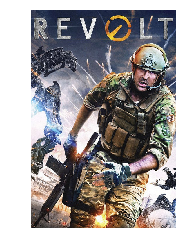

In [55]:
showImage(qwerty[1],1)